# K-Nearest Neighbors

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import time

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
def eucledian(p1, p2):
    '''Eucledian Distance
    Definition: a       = eucledian(p1,p2)
    Input:      p1      - point of D features
                p2      - point of D features
    Output:     a       - eucledian distance of p1 and p2
    '''
    return np.sqrt(np.sum((p1-p2)**2))
    
class knn:
    def __init__(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train
    
    def predict(self, X_test, k):
        '''Predicts the labels of test dataset
        Definition: y_predictions = predict(X_test)
        Input:      X_test        - DxN test dataset
                    k             - k value
        Output:     y_predictions - N array of predicted labels
        '''
        y_predictions = []
        
        for i in range(len(X_test)):
            dist = np.array([eucledian(X_test[i], x_t) for x_t in self.X_train])
            dist_sort = dist.argsort()[:k]
            count = {}
            for idx in dist_sort:
                if self.Y_train[idx] in count:
                    count[self.Y_train[idx]] += 1
                else:
                    count[self.Y_train[idx]] = 1
                    
            count_sort = sorted(count.items(), key=lambda count: count[1], reverse=True)
            y_predictions.append(count_sort[0][0])
        
        return y_predictions

In [3]:
def plot_data(X, Y):
    '''Show Label and Data Image
    Definition:  plot_data(X,Y)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels
    '''
    fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8, 10))
    for i, ax in enumerate(axs.flat):
        ax.imshow(X[i].reshape(8,8))
        ax.set_title(f"Label: {Y[i]}")
    plt.show()

In [4]:
def load_dataset():
    '''Loads sklearn handwritten digits dataset
    Definition: load_dataset()
    Output:     X_train       - DxN train dataset
                X_tesT        - DxN test dataset
                Y_train       - DxN train labels
                Y_test        - DxN test labels
    '''
    mnist = load_digits()

    X = mnist.data
    Y = mnist.target

    return train_test_split(X, Y, test_size=0.25, random_state=7, shuffle=True)

Accuracy score for K( 1):    98.222222%   | Time: 4.57s
Accuracy score for K( 3):    98.666667%   | Time: 4.48s
Accuracy score for K( 5):    97.777778%   | Time: 4.51s
Accuracy score for K( 7):    98.222222%   | Time: 4.55s
Accuracy score for K( 9):    98.000000%   | Time: 4.65s
Accuracy score for K(11):    97.555556%   | Time: 4.75s
Accuracy score for K(13):    97.555556%   | Time: 4.76s
Accuracy score for K(15):    96.888889%   | Time: 4.44s
Accuracy score for K(17):    96.666667%   | Time: 4.63s
Accuracy score for K(19):    96.666667%   | Time: 4.40s
Accuracy score for K(21):    95.777778%   | Time: 5.11s
Accuracy score for K(23):    96.000000%   | Time: 4.73s
Accuracy score for K(25):    95.555556%   | Time: 4.77s


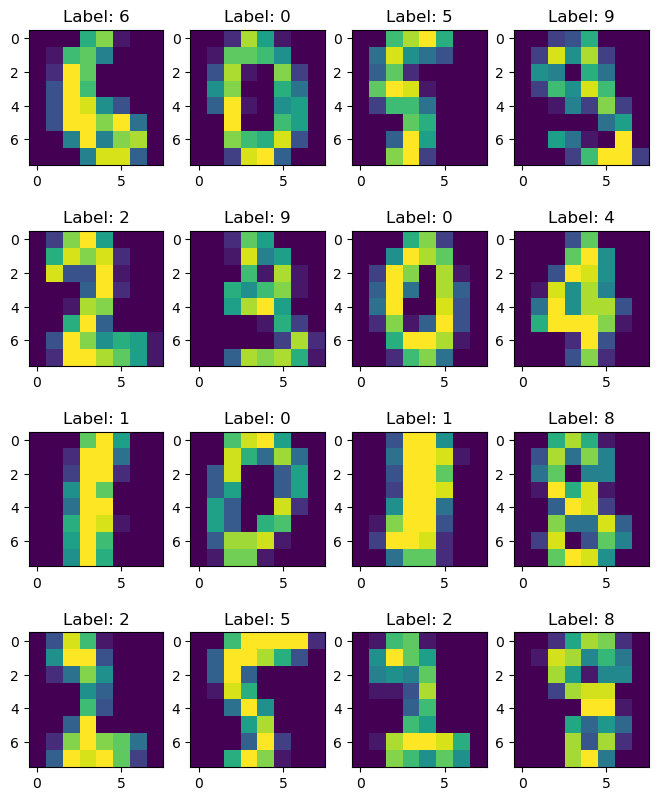

In [5]:
X_train, X_test, Y_train, Y_test = load_dataset()

model = knn(X_train, Y_train)

for k in range(1,26,2):
    start_time = time.time()
    y_predictions = model.predict(X_test, k)
    acc = accuracy_score(Y_test, y_predictions)
    print(f"Accuracy score for K({k:>2}):    {acc:%}   | Time: {(time.time() - start_time):,.2f}s")


plot_data(X_test, y_predictions)

In [6]:
def plot_data_keras(X, Y):
    '''Show Label and Data Image
    Definition:  plot_data(X,Y)
    Input:       X       -  DxN array of N data points with D features
                 Y       -  1D array of length N of class labels
    '''
    fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8, 10))
    for i, ax in enumerate(axs.flat):
        ax.imshow(X[i].reshape(28,28))
        ax.set_title(f"Label: {Y[i]}")
    plt.show()

Accuracy score for K( 1):    92.400000%   | Time: 23.69s
Accuracy score for K( 3):    93.000000%   | Time: 23.26s
Accuracy score for K( 5):    94.000000%   | Time: 22.46s
Accuracy score for K( 7):    93.400000%   | Time: 22.24s
Accuracy score for K( 9):    92.800000%   | Time: 22.96s
Accuracy score for K(11):    92.600000%   | Time: 23.28s
Accuracy score for K(13):    93.000000%   | Time: 22.86s
Accuracy score for K(15):    92.600000%   | Time: 22.52s
Accuracy score for K(17):    93.200000%   | Time: 22.80s
Accuracy score for K(19):    91.800000%   | Time: 22.92s
Accuracy score for K(21):    91.600000%   | Time: 22.66s
Accuracy score for K(23):    91.400000%   | Time: 22.76s
Accuracy score for K(25):    91.000000%   | Time: 22.82s


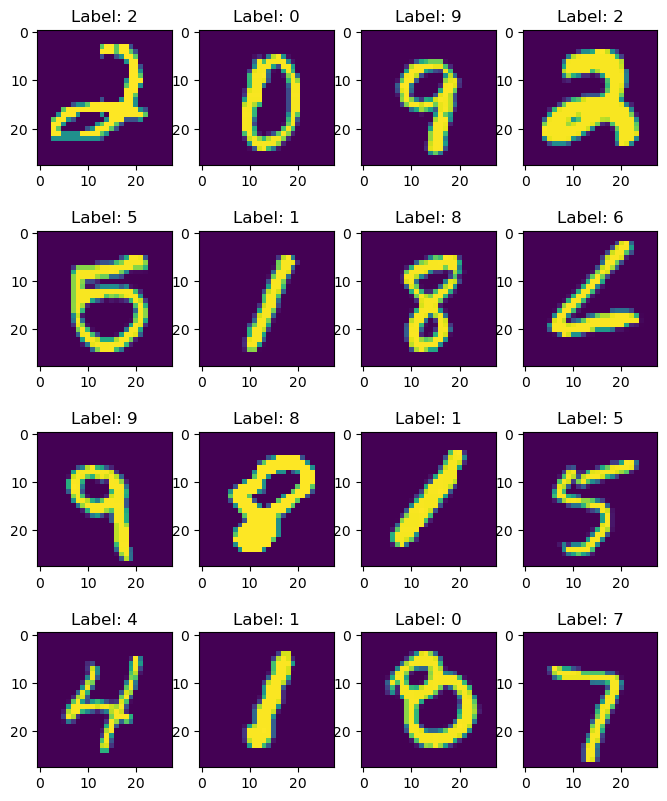

In [7]:
from keras.datasets import mnist

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

X_train.reshape(60000, 784)
X_test.reshape(10000, 784)

# Randomize data
indx_train = np.random.randint(0, len(X_train), 5000)
indx_test = np.random.randint(0, len(X_test), 500)

model = knn(X_train[indx_train], Y_train[indx_train])

for k in range(1,26,2):
    start_time = time.time()
    y_predictions = model.predict(X_test[indx_test], k)
    acc = accuracy_score(Y_test[indx_test], y_predictions)
    print(f"Accuracy score for K({k:>2}):    {acc:%}   | Time: {(time.time() - start_time):,.2f}s")


plot_data_keras(X_test[indx_test], y_predictions)